# AI 教材補充單元 - Pandas Quick Tutorial 
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
- @ 台南應用科技大學 資管系 杜主民

# 目錄
<a href='#一、讀取資料'>一、讀取資料</a><br>
<a href='#二、DataFrame-(資料框)'>二、DataFrame (資料框)</a><br>
<a href='#三、Series'>三、Series</a><br>
<a href='#四、常用屬性與方法'>四、常用屬性與方法</a><br>
<a href='#五、NaN-欄位(Missing-Value/遺漏值/空值)'> 五、NaN 欄位(Missing Value/遺漏值/空值)</a><br>
<a href='#六、移除欄位與列數 '>六、Drop 欄位與列數</a><br>
<a href='#七、NaN-欄位的處理'>七、NaN 欄位的處理</a><br>
<a href='#八、map,-apply,-applymap-函數'>八、map, apply, applymap 函數</a><br>
<a href='#九、cross-tabulation(交叉製表、混淆矩陣)'>九、cross tabulation (交叉製表、混淆矩陣)</a><br>
<a href='#十、groupby-群組化'>十、groupby 群組化</a><br>
<a href='# '> </a><br>
<a href='# '> </a><br>

## 什麼是 Pandas?
- **Pandas**是Python 家族語言有關資料清理、處理和分析的工具套件。
- **Pandas**是一個根植於**Numpy**的套件，主要有兩大資料的結構: **Series** 和 **DataFrames**。
- 所謂的**Series**是一維的欄位，類似Excel表格的一列或一行。
- **DataFrame**是二維，有列數(rows)和欄位(columns)，類似於Excel整個的表格型態。
- Pandas 提供比 Numpy 更有彈性和效果(例如處理遺漏值、欄位不同的資料型別等等)的作法以處理二為型的表格。
- Pandas 也提供許多類似於資料庫和Excel的函數功能。

## 一、讀取資料
<a href='#目錄'>回目錄</a>

### 載入 pandas 套件

In [1]:
import pandas as pd  # pd 是別名 (alias)

### 使用 read_table() 讀取資料集檔案

In [2]:
# 直接從 URL 讀取資料集 Chiporders，並存入 orders 資料框 (DataFrame)，此資料集的分隔符號是 '\t'，預設的分隔符號是 '|'，不需再設定
orders = pd.read_table('http://bit.ly/chiporders')

### 顯示前五筆資料

In [3]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [16]:
# 再次從網路 URL 資源讀取另一個資料集檔案 movieusers，此資料集的分隔符號是 '|'，必需清楚設定
users = pd.read_table('http://bit.ly/movieusers', sep='|') 
users.head()

### 使用 read_csv 讀取資料集檔案
- 使用 read_csv()函式，預設會以逗號 ( ',' ) 分隔欄位，不須額外指定分隔符號

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

### 讀取 excel 檔案
- 使用 read_excel() 讀取外部檔案 
- 使用 sheet_name 選擇 excel 的工作表

In [ ]:
ufo_excel = pd.read_excel('./data/ufo_excel.xlsx')
ufo_excel.head()

### 絕對路徑讀取檔案

In [ ]:
drinks = pd.read_csv('D:/cmd/師培/2021/Courses/人工智慧/教育部教材補充內容/code/data/drinks.csv')
drinks.tail() 

### 相對路徑讀取檔案

In [ ]:
drinks = pd.read_csv('./data/drinks.csv')
drinks.head()

In [ ]:
ufo_excel2 = pd.read_excel('./data/ufo_excel.xlsx', sheet_name='gapminder')
ufo_excel2.head()

## 寫入檔案
- 在 Pandas 處理完畢資料後，經常需要將 DataFrame 寫入外部檔案保存。
- pd.to_csv()
- pd.to_excel()
- 針對料庫的讀寫暫略。

### 寫入為 .csv 檔案使用 to_csv() 函數

In [ ]:
# 預設是寫入檔案後保留 index
drinks.to_csv('./data/drinksTest.csv', header=True)
#drinks.to_csv('d:./data/drinksTest.csv', header=True, index=False) # 去除 index

### 寫入為 .xlsx 檔案使用 to_excel() 函數

In [ ]:
drinks.to_excel('./data/drinksTest2.xlsx', header=True, index=False)
#drinks.to_excel('d:./data/drinksTest2.xlsx', header=True, index=False) # 去除 index

<hr style='border-color:brown; border-width:3px'>

## 二、DataFrame (資料框)
<a href='#目錄'>回目錄</a>

In [6]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [8]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [15]:
ufo['Colors Reported']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18236    NaN
18237    NaN
18238    NaN
18239    RED
18240    NaN
Name: Colors Reported, Length: 18241, dtype: object

## 建立自己的 DataFrame 1

In [3]:
import numpy as np  # np 是別名 (alias)

In [22]:
# 以常態分布的隨機樣本建立 4 列 3 欄的陣列
rnd = np.random.randn(4,3)
rnd

array([[ 0.89123383, -0.06997474, -0.30164757],
       [ 0.01214208,  1.56301985,  1.0339385 ],
       [ 1.33426575, -1.12202931,  0.33806306],
       [ 1.56403083, -1.12573183, -0.80746405]])

In [23]:
# 以 rnd 建立 DataFrame
col = ['第一欄', '第二欄', '第三蘭']
df1 = pd.DataFrame(rnd, columns = col)
df1

,第一欄,第二欄,第三蘭
0,0.891234,-0.069975,-0.301648
1,0.012142,1.563020,1.033939
2,1.334266,-1.122029,0.338063
3,1.564031,-1.125732,-0.807464


## 建立自己的 DataFrame 2

In [4]:
# 建立一個 5x2 NumPy 陣列.
my_data1 = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

In [ ]:
type(my_data1)

In [7]:
# 另一個方法建立一個 5x2 NumPy 陣列.
my_data2 = np.random.randint(0, 101, size=(5,2))

In [ ]:
type(my_data2)

In [9]:
col = ['第一欄', '第二欄']

In [10]:
# 建立資料框
df1 = pd.DataFrame(my_data1, columns=col)
df2 = pd.DataFrame(my_data2, columns=col)

In [ ]:
print(df1)
print(df2)

## 新增資料框欄位

In [ ]:
df1['第三欄'] = df1['第一欄'] + df1['第二欄']
df1

In [ ]:
df2['第三欄'] = df2['第一欄'] + df2['第二欄']
df2

## 取出資料框 subset
- 取出資料欄位
- 取出資料列數

###  取出資料欄位
- DataFrame 的每一個欄位稱為 **Series**

In [ ]:
# 取出 City 欄位
ufo['City']
#ufo.City

In [ ]:
# 取出 City 與 State 欄位
ufo[['City', 'State']]

### 取出資料列數
- 方法一: 使用 **iloc**
- 方法二: 使用 **loc**

### 方法一: **iloc**，透過`索引順序`取出資料

In [61]:
# 取出 df1 第 0 列資料
df1.iloc[0]

第一欄    0
第二欄    3
第三欄    3
Name: 0, dtype: int32

In [62]:
# 取出 df1 第 0, 1, 3 列資料
df1.iloc[[0, 1, 3]]

,第一欄,第二欄,第三欄
0,0,3,3
1,10,7,17
3,30,14,44


### 方法二: **loc**，透過`索引值`取出資料

#### 更改 df2 索引為 1, 2, 3, 4, 5
- 使用 `index` 更改索引

In [84]:
df2.index = list([1,2,3,4,5])

In [85]:
# 取出 df2 第 '1' 列資料
df2.loc[1]

第一欄    80
第二欄     5
第三欄    85
Name: 1, dtype: int32

In [87]:
# 取出 df2 第 '1, 3, 5' 列資料
df2.loc[[1, 3, 5]]

,第一欄,第二欄,第三欄
1,80,5,85
3,46,62,108
5,38,97,135


### 同時取出列數與欄位

In [96]:
# 取出 df1 第 1, 3 列的第一欄位和第二欄位資料
df1.iloc[[1, 3]][['第一欄','第二欄']]

,第一欄,第二欄
1,10,7
3,30,14


In [97]:
# 取出 df2 第 1, 3, 5 列的第一欄位和第二欄位資料
df2.loc[[1, 3, 5]][['第一欄','第三欄']]

,第一欄,第三欄
1,80,85
3,46,108
5,38,135


In [125]:
# loc, 取出第 1 到第 4 列的第一欄位到第二欄位資料
df2.loc[1:4, '第一欄':'第二欄']

,第一欄,第二欄
1,80,5
2,65,10
3,46,62
4,82,47


In [128]:
# iloc, 取出第 1 到第 4 列的第一欄位到第二欄位資料
df2.iloc[0:4, 0:2]

,第一欄,第二欄
1,80,5
2,65,10
3,46,62
4,82,47


<hr style='border-color:brown; border-width:3px'>

## 三、Series
- DataFrame 的單一欄位稱為 Series
- 從 DataFrame (資料框) 取出 Series
- 使用 bracket notation 語法
- 使用 dot notation 語法 <br>
<a href='#目錄'>回目錄</a>

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

In [ ]:
city = ufo['City'] # 使用 bracket notation 語法取出 City 欄位
#city = ufo.city    # 使用 bracket notation 語法取出 City 欄位
print('city 欄位型態:', type(city))
print(city)

### 將 Series 當成一維陣列 (one-dimensional array)

In [16]:
# 建立一個 Series 物件
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [17]:
print(data.keys())  # 取出 index 
print(data.values)  # 取出元素值
print(list(data.items()))  # 取出每一個成對的索引和元素內容
data['e'] = 1.5     # 新增索引和元素內容

Index(['a', 'b', 'c', 'd'], dtype='object')
[0.25 0.5  0.75 1.  ]
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


### masking(遮罩)
- 在取用 Series 或 DataFrame 內容時，我們會經常會設定過濾條件，符合條件的內容才取出。
- 符合過濾條件的元素會回傳 **True**，不符合過濾條件的元素會回傳 **False**。
- 選取 **True** 的元素，過濾掉回傳 **False**的元素。

In [ ]:
data > 0.5

In [ ]:
data[data > 0.5]

### fancy indexing 簡介
- fancy indexing 的概念是傳入陣列的 index 到想要取用的陣列。

In [19]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
x = ['a', 'c']
data[x]  # 取出 'a','c' 索引的值

<hr style='border-color:brown; border-width:3px'>

## 四、常用屬性與方法
<a href='#目錄'>回目錄</a>

### 一些 DataFrame & Series 常用的屬性或方法
- shape
- size
- dtypes
- columns
- values
- describe()
- value_counts()

In [20]:
import pandas as pd

In [21]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [26]:
print('drinks.shape:', drinks.shape)
print('drinks.size:', drinks.size)

drinks.shape: (193, 6)
drinks.size: 1158


In [ ]:
print('drinks.dtypes:',drinks.dtypes)

In [ ]:
print('drinks.columns:\n', drinks.columns)

In [ ]:
print('drinks.country.values:\n',drinks.country.values)

In [ ]:
print(drinks.describe())
#print(drinks.describe(include='object'))

In [36]:
print(drinks.continent.value_counts() ) # 計算出現次數

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64


In [41]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


<hr style='border-color:brown; border-width:3px'>

## 五、NaN 欄位(Missing Value/遺漏值/空值)
<a href='#目錄'>回目錄</a>

- `isnull()` 檢驗欄位是否為遺漏值，遺漏值的欄位以 `NaN` 表示，代表此欄位不存在任何內容。<p>
- 參考: <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html'>pandas.DataFrame.isna</a>
- 參考: <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull'>pandas.DataFrame.isnull</a> <p>
PS: pandas 的 `isna` 和 `isnull` 事實上是相同的函數，請參考 <a href='https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas'>Difference between isna() and isnull() in pandas</a>

### 統計空值

In [43]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.City.isnull() # 檢視 City 欄位是否空值

### 查出 City 為 NULL 的筆數

In [50]:
ufo.City.isnull().sum()

25

### 使用 mask 找出 City 為 NULL 的資料列

In [52]:
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


### 利用 notnull() 取出非 NULL 的資料列

In [53]:
ufo[ufo.City.notnull()].head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [54]:
# 顯示 Colors Reported 是 NULL 的數量
ufo[ufo['Colors Reported'].isnull()].shape

(15359, 5)

In [55]:
# 顯示 Colors Reported 是 notnull 的數量
ufo[ufo['Colors Reported'].notnull()].shape

(2882, 5)

#### isnull() 和 notnull() 兩者相加 15359 + 2882 = 18241 即是所有資料筆數

In [56]:
ufo.shape

(18241, 5)

<hr style='border-color:brown; border-width:3px'>

## 六、移除欄位與列數
<a href='#目錄'>回目錄</a>
- 移除欄位或列數使用 **drop()** 方法
- axis=1 表示移除的對象是欄位 (columns)
- axis=0 表示移除的對象是列數 (rows)

### 移除欄位

In [57]:
ufo.head()### 移除列數

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.drop(['City'], axis=1).head()

In [59]:
# 但是...事實上 'City' 並沒有被刪除
ufo.head() 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


- drop() 加入 **inplace** 參數，直接刪除欄位
- 加入 `inplace=True` 參數後，'City' 欄位會直接被刪除
- [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) 參考文件

In [60]:
# 加入 inplace 參數
ufo.drop(['City'], axis=1, inplace=True)
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


### 也可執行一次移除多個欄位

In [61]:
ufo = pd.read_csv('http://bit.ly/uforeports')
# 一次同時移除 'City', 'State' 欄位
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Colors Reported,Shape Reported,Time
0,NaN,TRIANGLE,6/1/1930 22:00
1,NaN,OTHER,6/30/1930 20:00
2,NaN,OVAL,2/15/1931 14:00
3,NaN,DISK,6/1/1931 13:00
4,NaN,LIGHT,4/18/1933 19:00


### 移除列數

In [66]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [67]:
# 想要刪除 index = 1 (city 為 'Willingboro' 開頭的列數)
ufo.drop(ufo.index[1], axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30


In [68]:
# 連續刪除 index 從 2-5 的欄位
ufo.drop(ufo.index[2:5], axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00


<hr style='border-color:brown; border-width:3px'>

## 七、NaN 欄位的處理
<a href='#目錄'>回目錄</a>

In [69]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

- 從 `ufo.isnull().sum()` 得知 ufo 資料集的 'Colors Reported' 欄位有 15359 筆 NaN。
- 相較於整體 ufo 資料集有 18241 筆資料，NaN 的比例異常的高。
- 如何處理 missing values 需視資料集本身的情況，以及想要從事的分析方法，但主要有兩個函式:
  - **dropna()**: 刪除 NaN 資料列。
  - **fillna()**: 在 NaN 填入適當內容。

在進行資料清理的過程中，有關 NaN 所衍生的處理方法大抵有下列幾種:
1. 找出/顯示那些元素是 NaN
2. 或者刪除 NaN 的資料列
3. 或者填充 NaN 所在的元素

以下以一個自建 5x3 含有 NaN 的 DataFrame 當成範例說明 NaN 的處理。

In [158]:
# 一 個 5 x 3 的 Numpy array d
import numpy as np
import random

d = np.random.randint(1, 100, (5, 3))
# 將陣列 d 轉換為 DataFrame df
df = pd.DataFrame(d, columns=['Aa', 'Bb', 'Cc'])

# 在 df 隨機設定 3 個 NaN
for i in range(3):
    x = random.randint(0, 4)
    y = random.randint(0, 2)
    df.iloc[x,y] = np.nan  # 以 np.nan (NaN) 取代現有欄位

# 再新增一列全是 NaN 的資料列
df = df.append({'Aa':np.nan, 'Bb': np.nan, 'Cc': np.nan}, ignore_index=True)
df

,Aa,Bb,Cc
0,73.0,53.0,75.0
1,9.0,36.0,NaN
2,83.0,1.0,98.0
3,67.0,NaN,54.0
4,69.0,62.0,22.0
5,NaN,NaN,NaN


## 目前 df 資料框共有 6 筆 3 個欄位，且共有 6 個 NaN

### 1. 找出/顯示那些元素是 NaN

In [159]:
df.isnull()

,Aa,Bb,Cc
0,False,False,False
1,False,False,True
2,False,False,False
3,False,True,False
4,False,False,False
5,True,True,True


- any 搭配 isnull()，代表任一列，或任一欄位有 NaN。
- all 搭配 isnulll()，代表任一列或是欄位所有元素都是 NaN。

In [160]:
# 任一欄有 NaN
df.isnull().any()

Aa    True
Bb    True
Cc    True
dtype: bool

In [161]:
# 任一列有 NaN
df.isnull().any(axis=1)

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool

In [162]:
# 任一欄所有資料都是 NaN
df.isnull().all()

Aa    False
Bb    False
Cc    False
dtype: bool

In [163]:
# 任一列所有資料都是 NaN
df.isnull().all(axis=1)

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [164]:
# 每個欄位各有幾個 NaN
df.isnull().sum()

Aa    1
Bb    2
Cc    2
dtype: int64

In [165]:
# 每個列述各有幾個 NaN
df.isnull().sum(axis=1)

0    0
1    1
2    0
3    1
4    0
5    3
dtype: int64

### 2.刪除 NaN 的資料列
- 刪除 NaN 的資料列可以分成下列三種狀況:
- dropna(how='`?`') 有三種可能用法:
    - a). dropna(how='**any**'): 只要資料列有NaN，一律刪除。
    - b). dropna(how='**all**'): 所有欄位都是NaN才刪除。
    - c). dropna(**subset=[`?`]**, how='**all**'): 當 subset 的欄位全是NaN時，一律刪除。

In [167]:
df2 = df.copy()
df2

,Aa,Bb,Cc
0,73.0,53.0,75.0
1,9.0,36.0,NaN
2,83.0,1.0,98.0
3,67.0,NaN,54.0
4,69.0,62.0,22.0
5,NaN,NaN,NaN


### 1).只要資料列有 NaN，一律刪除

In [168]:
df2.dropna(how='any') # 預設 axis=0

,Aa,Bb,Cc
0,73.0,53.0,75.0
2,83.0,1.0,98.0
4,69.0,62.0,22.0


In [169]:
df2

,Aa,Bb,Cc
0,73.0,53.0,75.0
1,9.0,36.0,NaN
2,83.0,1.0,98.0
3,67.0,NaN,54.0
4,69.0,62.0,22.0
5,NaN,NaN,NaN


- 原本 df 有 6 列，其中 3 個資料列有 NaN，所以剩下上面三列資料未被刪除。
- 事實上 df 的資料尚未被刪除，之所以看起來只剩三列資料是因為 pandas 在預設的情形下會將計算結果拷貝另一個物件然後回傳，原有的 df 沒有改變。
- 若要直接更新原始的 df，加上參數 `inplace=True` <p>

*df.dropna(how='any`, inplace=True)*

In [170]:
df2.dropna(how='any', inplace=True) # 預設 axis=0
df2

,Aa,Bb,Cc
0,73.0,53.0,75.0
2,83.0,1.0,98.0
4,69.0,62.0,22.0


### 2).所有欄位都是NaN才刪除。

In [171]:
df2 = df.copy()
df2.dropna(how='all', inplace=True)
df2

,Aa,Bb,Cc
0,73.0,53.0,75.0
1,9.0,36.0,NaN
2,83.0,1.0,98.0
3,67.0,NaN,54.0
4,69.0,62.0,22.0


### 3).刪除全部是 NaN 的 subset 欄位。

In [172]:
df2 = df.copy()

#### 刪除 Bb & Cc 欄位都是 NaN的資料列

In [191]:
df2.dropna(subset=['Aa','Bb'], how='all', inplace=True)
df2

,Aa,Bb,Cc
0,73.0,53.0,75.0
1,9.0,36.0,NaN
2,83.0,1.0,98.0
3,67.0,NaN,54.0
4,69.0,62.0,22.0


### 3.填入 NaN 所在的元素
- 既然我們知道如何找出那些元素是 NaN，也知道如何刪除 NaN 的資料列，但是，許多情況下資料列並不因有 NaN 就必須刪除。
- 若該欄位是數值資料，通常會考慮在 NaN 的元素填入該資料列的平均值，或是將 NaN 的前一筆或是後一筆的資料內容填入該 NaN。
- 若該欄位是類別型資料，可以考慮用其它名稱替換。
- 在 NaN 欄位填入平均值/前一筆/後一筆等內容，使用的是 **fillna()** 函數。

In [193]:
# 在新增一個名為 'name' 的 Series 欄位至 df
name = pd.Series(['Jason','Maria','Spike','Brown', np.nan, 'Lora'])
df.insert(0, 'name', name)
df

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,NaN,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


#### 第一種情況: 若 NaN 欄位是類別或字串型別資料，可以考慮用其它名稱替換。

In [195]:
# 以 'Unknow' 替換 name' 欄位的 NaN  
df2 = df.copy()
df2.name.fillna('N/A', inplace=True)
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,N/A,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


#### 第二種情況: 數值資料，填入平均值。
- 平均值可以是`資料列`或`欄位`的平均值。
- 以前述的 df 範例來說，比較合適的方式是取`資料列`的平均值。
- 在 pandas 使用 mean(）函數僅會計算數值型資料，也不列入 NaN。

In [197]:
# 'Aa'欄位的平均值
Aa_mean = df2.Aa.mean()
df2.Aa.fillna(Aa_mean, inplace=True)
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,N/A,69.0,62.0,22.0
5,Lora,60.2,NaN,NaN


### 迭代式填入平均值

In [198]:
df2 = df.copy()
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,N/A,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


In [206]:
col_mean = df2.mean(axis=0)
col_mean

Aa    60.20
Bb    38.00
Cc    62.25
dtype: float64

In [214]:
# 迭代式填入 NaN 欄位
for c in df2[['Aa','Bb','Cc']]:
    df2[c].fillna(col_mean[c], inplace=True)
    
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.00
1,Maria,9.0,36.0,62.25
2,Spike,83.0,1.0,98.00
3,Brown,67.0,38.0,54.00
4,N/A,69.0,62.0,22.00
5,Lora,60.2,38.0,62.25


In [215]:
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.00
1,Maria,9.0,36.0,62.25
2,Spike,83.0,1.0,98.00
3,Brown,67.0,38.0,54.00
4,N/A,69.0,62.0,22.00
5,Lora,60.2,38.0,62.25


#### 第三種情況: 數值資料，將 NaN 的前一筆或是後一筆的資料內容填入該 NaN。
- 將 NaN 填入前一筆資料在使用 fillna() 函數時加上 method=`'ffill'` 參數。
- 將 NaN 填入後一筆資料在使用 fillna() 函數時加上 method=`'bfill'` 參數。

In [216]:
df2 = df.copy()
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,N/A,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


In [217]:
# method='ffill'
df2.fillna(method='ffill', inplace=True)
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,75.0
2,Spike,83.0,1.0,98.0
3,Brown,67.0,1.0,54.0
4,N/A,69.0,62.0,22.0
5,Lora,69.0,62.0,22.0


In [218]:
df2 = df.copy()
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,NaN
2,Spike,83.0,1.0,98.0
3,Brown,67.0,NaN,54.0
4,N/A,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


In [219]:
# method='bfill'
df2.fillna(method='bfill', inplace=True)
df2

,name,Aa,Bb,Cc
0,Jason,73.0,53.0,75.0
1,Maria,9.0,36.0,98.0
2,Spike,83.0,1.0,98.0
3,Brown,67.0,62.0,54.0
4,N/A,69.0,62.0,22.0
5,Lora,NaN,NaN,NaN


### 再練習一個 NaN 案例
- 填入欄位平均值
- 填入 NaN 的前一個欄位值
- 填入 NaN 的後一個欄位值

In [220]:
# 建一個 df2 DataFrame
df2 = pd.DataFrame({'ColA': [1, np.nan, np.nan, 4, 5, 6, 7], \
                    'ColB': [1, 1, 1, 1, 2, 2, 2], \
                    'ColC': [np.nan, 8, 4, 9, np.nan, 5, 7]})
df2

,ColA,ColB,ColC
0,1.0,1,NaN
1,NaN,1,8.0
2,NaN,1,4.0
3,4.0,1,9.0
4,5.0,2,NaN
5,6.0,2,5.0
6,7.0,2,7.0


## 練習 Titanic 資料集
- 請使用 titanic (http://bit.ly/kaggletrain) 的 資料集。
- 請讀取後找到有 NaN 的欄位
- 若是數字型的欄位，請以平均值填入 NaN；若為字串型態資料，請填入 'unknown'。

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv('http://bit.ly/kaggletrain')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# 找出 Embarked NaN
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# 計算平均年紀
age_mean = titanic.Age.mean()

In [8]:
titanic.Age.fillna(value=age_mean, inplace=True)

In [9]:
# 在一次檢視 NaN
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<hr style='border-color:brown; border-width:3px'>

## 八、map, apply, applymap 函數
<a href='#目錄'>回目錄</a><br>

- **map()** 是針對單一 Series 操作的函數
- **applymap()** 是針對整體 DataFrame 操作的函數
- **apply()** 既可在單一 Series 也可使用在整體 DataFrame 操作的函數

In [2]:
import pandas as pd

In [3]:
dft = pd.DataFrame({
    'Col1': [30,40,50,60],
    'Col2': [23,35,65,45],
    'Col3': [85,87,90,89],

},index=["A","B","C","D"])
dft2 = dft.copy()
dft2

,Col1,Col2,Col3
A,30,23,85
B,40,35,87
C,50,65,90
D,60,45,89


#### 使用 map()

In [4]:
# 將 Col1 欄位除以 10
dft2.Col1 = dft2.Col1.map(lambda x: x/10)
dft2

,Col1,Col2,Col3
A,3.0,23,85
B,4.0,35,87
C,5.0,65,90
D,6.0,45,89


#### 使用 apply() - 針對單一 Series

In [5]:
dft2 = dft.copy()
dft2.Col1 = dft2.Col1.apply(lambda x: x/10) # 將 Col1 欄位除以 10
dft2

,Col1,Col2,Col3
A,3.0,23,85
B,4.0,35,87
C,5.0,65,90
D,6.0,45,89


#### 使用 apply() - 針對整個 DataFrame

In [6]:
dft2 = dft.copy()
dft2 = dft2.apply(lambda x: x/10)  # 將所有欄位除以 10
dft2

,Col1,Col2,Col3
A,3.0,2.3,8.5
B,4.0,3.5,8.7
C,5.0,6.5,9.0
D,6.0,4.5,8.9


#### 使用 applymap()

In [7]:
dft.applymap(lambda x: x/10) # 將 Col1 欄位除以 10

,Col1,Col2,Col3
A,3.0,2.3,8.5
B,4.0,3.5,8.7
C,5.0,6.5,9.0
D,6.0,4.5,8.9


## 九、cross tabulation(交叉製表、混淆矩陣)
<a href='#目錄'>回目錄</a><br>
- cross tabulation 的功用是製作表格，用以顯示某個群組值出現**頻率次數**的方法。

In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv("http://bit.ly/imdbratings")
movies.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [3]:
movies.describe() # 只針對數值型資料的統計

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [4]:
movies.describe(include='object') # 針對非數字型資料的統計

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [5]:
# movies.genre 是字串物件資料
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

- movies.genre.describe() 顯示 `genre` 欄位的統計資料
- 其中 **coun**t 表示有 979 筆資料；**unique** 表示 979 筆資料共有 16 種類別
- **top** 表示最常出現的值是 **Drama**
- **Drama**出現的次數(freq)是 278 次

#### value_counts() 較 describe() 更深入顯示各個類別的統計量

In [6]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

#### value_counts() 加入 normalize=True 參數，顯示每一類別出現的百分比例

In [7]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

#### unique() 取得欄位的唯一值

In [10]:
movies.genre.unique()
#movies.genre.nunique() # 顯示種類的數量

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

#### crosstab 交叉製表(混淆矩陣)
- 顯示兩個變數值的次數分佈(frequency distribution)

In [22]:
# 顯示 genre 欄位和 content_rating 的分布矩陣
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


- 欄位的說明請參考Kaggle網站的 <a href='https://www.kaggle.com/c/titanic/data'>Titanic 資料描述</a>
- 再以 titaic 資料集為例，欄位 `Embarked` (出發港口)上船的人其搭乘的不同艙等次數各是多少? 
- 讀取資料網址: http://bit.ly/kaggletrain

In [12]:
titanic = pd.read_csv('http://bit.ly/kaggletrain')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
titanic[['Embarked','Pclass']].notnull().sum()

Embarked    889
Pclass      891
dtype: int64

In [15]:
pd.crosstab(titanic.Embarked, titanic.Pclass).sum(axis=1)

Embarked
C    168
Q     77
S    644
dtype: int64

<hr style='border-color:brown; border-width:3px'>

## 十、groupby 群組化
<a href='#目錄'>回目錄</a><br>
- 數據分析的群組化概念和資料庫的群組化(`group by`)觀念雷同，都是將資料分群的概念。
- 使用`groupby()`函數。

In [79]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('http://bit.ly/uforeports')
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 以 Sate 分群，找出每個州發現 UFO 的次數，以'Time'欄位遞減排列；再取出前 10 筆繪製長條圖

In [17]:
df_state = df.groupby('State')
df_state_count = df_state.count()

In [18]:
df_state_count.sort_values(by='Time', ascending=False, inplace=True)
df_state_count.head()

,City,Colors Reported,Shape Reported,Time
State,,,,
CA,2525,457,2148,2529
WA,1320,269,925,1322
TX,1025,138,923,1027
NY,913,123,823,914
FL,835,120,727,837


In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

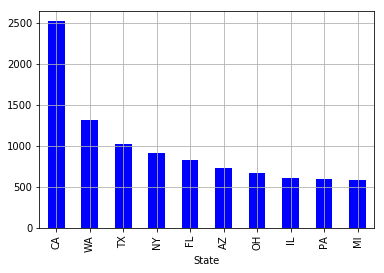

In [20]:
df_state_count.iloc[0:10, :].Time.plot(kind='bar',color='blue')
plt.grid(True)

### 取出群組內的資料
- 使用 `get_group()`

In [ ]:
# 取出特定州的分群結果
df_state.get_group('NY')

### 在資料庫SQL，群組化通常搭配聚合函數操作，在 Pandas 也是相同的方式
- 在 Pandas 的聚合函數稱為 `aggregate`

### 計算某群組內的基本統計量 (aggregate 聚合函數)
- 加總 `sum()`
- 平均值 `mean()`
- 最大值 `max()`
- 最小值 `min()`
- 次數 `count()`

### 使用 drinks 資料集

In [23]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [145]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

#### 以`continent`群組化

In [24]:
drinks_gp = drinks.groupby('continent')

In [25]:
#drinks_gp.aggregate(['mean'])      # 以 continent 分群後搭配 mean
drinks_gp.aggregate(['mean','sum']) # 以 continent 分群後搭配 mean & sum

beer_servings       spirit_servings       wine_servings        \
                       mean   sum            mean   sum          mean   sum   
continent                                                                     
Africa            61.471698  3258       16.339623   866     16.264151   862   
Asia              37.045455  1630       60.840909  2677      9.068182   399   
Europe           193.777778  8720      132.555556  5965    142.222222  6400   
North America    145.434783  3345      165.739130  3812     24.521739   564   
Oceania           89.687500  1435       58.437500   935     35.625000   570   
South America    175.083333  2101      114.750000  1377     62.416667   749   

              total_litres_of_pure_alcohol         
                                      mean    sum  
continent                                          
Africa                            3.007547  159.4  
Asia                              2.170455   95.5  
Europe                            8.617778  387.8  
North America                     5.995652  137.9  
Oceania                           3.381250   54.1  
South America                     6.308333   75.7

In [38]:
drinks_gp = drinks.groupby(['continent'])
drinks_gp.size()
#drinks_gp.get_group('Africa')

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
dtype: int64

- 在 crosstab (交稱製表) 單元，求出欄位`Embarked` (出發港口)上船的人其搭乘的不同艙等次數各是多少，使用 `groupby + aggregate` 也可很快求出解答

In [39]:
titanic = pd.read_csv('http://bit.ly/kaggletrain')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [40]:
# 以 Pclass 分群
titanic_gp = titanic.groupby('Embarked')

In [41]:
titanic_gp.count()['Pclass']
# titanic_gp.describe()

Embarked
C    168
Q     77
S    644
Name: Pclass, dtype: int64

### 使用兩個欄位 groupby 

In [180]:
movies = pd.read_csv("http://bit.ly/imdbratings")
movies.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [181]:
movies_gb2 = movies.groupby(['content_rating', 'genre'])

In [182]:
movies_gb2.aggregate(['mean'])

star_rating    duration
                                mean        mean
content_rating genre                            
APPROVED       Action       7.633333  143.333333
               Adventure    8.100000  158.333333
               Animation    7.600000   84.666667
               Biography    7.900000  111.000000
               Comedy       8.088889  108.333333
               Crime        8.133333  102.833333
               Drama        8.133333  119.583333
               Film-Noir    8.100000   88.000000
               Horror       7.700000   82.500000
               Mystery      8.150000  118.000000
               Sci-Fi       7.800000   92.000000
               Thriller     8.000000  108.000000
               Western      8.300000  132.000000
G              Action       7.800000  178.000000
               Adventure    8.050000  162.000000
               Animation    7.950000   93.150000
               Biography    8.000000  143.000000
               Comedy       8.150000   86.000000
               Drama        8.133333  170.666667
               Family       7.800000  100.000000
               Mystery      8.300000  160.000000
GP             Action       7.700000  144.000000
               Biography    8.000000  172.000000
               Comedy       8.100000   91.000000
NC-17          Comedy       7.600000   95.000000
               Crime        7.500000  106.000000
               Drama        7.650000  138.250000
               Horror       7.600000   85.000000
NOT RATED      Action       7.925000  129.500000
               Adventure    8.160000  113.200000
...                              ...         ...
PG-13          Sci-Fi       7.900000   91.000000
               Western      8.600000  175.000000
R              Action       7.864179  123.850746
               Adventure    7.882353  124.882353
               Animation    7.900000  101.000000
               Biography    7.919444  132.138889
               Comedy       7.732877  107.561644
               Crime        7.880460  127.114943
               Drama        7.874825  125.790210
               Fantasy      7.700000  112.000000
               Horror       7.812500  108.062500
               Mystery      7.933333  111.000000
               Sci-Fi       7.966667  120.666667
               Thriller     7.633333  114.333333
               Western      8.133333  133.666667
TV-MA          Drama        8.100000  131.000000
UNRATED        Action       8.266667  110.666667
               Adventure    8.150000  136.000000
               Animation    8.500000   89.000000
               Comedy       7.875000  103.750000
               Crime        7.872727  112.909091
               Drama        8.033333  118.777778
               Film-Noir    7.700000  111.000000
               History      8.000000   66.000000
               Horror       8.040000   98.000000
               Mystery      7.900000   86.000000
X              Comedy       7.800000   84.000000
               Crime        8.400000  136.000000
               Drama        8.000000  113.000000
               Horror       7.500000   92.000000

[95 rows x 2 columns]

## 星巴克資料集
- https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey

In [183]:
starbucks = pd.read_csv('./data/Starbucks satisfactory survey encode cleaned.csv')
starbucks.head(3)

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0


## 測試內政部人口生育死亡婚姻等數據 (111 年 03 月的資料)
- Reference: <a href='https://data.gov.tw/dataset/131138'>https://data.gov.tw/dataset/131138</a>

## Question: 
### 請連結上述網頁的內政部人口生育死亡婚姻數據，請使用 <u>11103各村（里）人口統計月報表（含同婚）</u> 資料集。
1. **請找出每個縣市新生兒的出生數量。**
2. **請找出台南市每個區新生兒數量以及死亡人數。**
4. **找出出生人數大於死亡人數的縣市。**
4. **請找出出生數小於死亡人數的縣市。**
5. **那麼，那個縣市的人口出生和死亡比例情況最糟呢? 請由最糟到最好排序。**

In [1]:
import pandas as pd
import numpy as np

In [42]:
census11103 = pd.read_csv('./data/opendata11103M013.csv')
census11103.head()

,statistic_yyymm,district_code,site_id,village,birth_total,birth_total_m,birth_total_f,death_total,death_m,death_f,marry_pair_OppositeSex,marry_pair_SameSex,marry_pair_SameSex_m,marry_pair_SameSex_f,divorce_pair_OppositeSex,divorce_pair_SameSex,divorce_pair_SameSex_m,divorce_pair_SameSex_f
0,統計年月,區域別代碼,區域別,村里名稱,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,11103,65000010001,新北市板橋區,留侯里,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,11103,65000010002,新北市板橋區,流芳里,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,11103,65000010003,新北市板橋區,赤松里,1,0,1,2,0,2,0,0,0,0,0,0,0,0
4,11103,65000010004,新北市板橋區,黃石里,4,3,1,1,1,0,0,0,0,0,0,0,0,0


### 變更欄位名稱 - 將第 0 列變成為欄位名稱

In [43]:
cols = census11103.iloc[0,:]  # 取出第 0 筆資料
census11103.columns = cols  # 將 0 筆資料替換 columns
census11103.drop(census11103.index[0], axis=0, inplace=True) # 刪除 index = 0 的資料列

In [44]:
allYearDataGP = census11103.groupby('區域別')

In [45]:
census11103.dtypes

0
統計年月         object
區域別代碼        object
區域別          object
村里名稱         object
出生數          object
出生數-男        object
出生數-女        object
死亡數          object
死亡數-男        object
死亡數-女        object
結婚對數_異性      object
結婚對數_同性      object
結婚對數_同性_男    object
結婚對數_同性_女    object
離婚對數_異性      object
離婚對數_同性      object
離婚對數_同性_男    object
離婚對數_同性_女    object
dtype: object

In [12]:
census11103.head(3)

,統計年月,區域別代碼,區域別,村里名稱,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,11103,65000010001,新北市板橋區,留侯里,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,11103,65000010002,新北市板橋區,流芳里,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,11103,65000010003,新北市板橋區,赤松里,1,0,1,2,0,2,0,0,0,0,0,0,0,0


### 檢視個欄位型態

In [46]:
census11103.dtypes

0
統計年月         object
區域別代碼        object
區域別          object
村里名稱         object
出生數          object
出生數-男        object
出生數-女        object
死亡數          object
死亡數-男        object
死亡數-女        object
結婚對數_異性      object
結婚對數_同性      object
結婚對數_同性_男    object
結婚對數_同性_女    object
離婚對數_異性      object
離婚對數_同性      object
離婚對數_同性_男    object
離婚對數_同性_女    object
dtype: object

### 從第 4 個欄位 (出生數) 一直到最後一個欄位在目前都是 object 的資料型態，將第 4 至第 17 欄位從 object 變更為 int
- 使用 `pd.to_numeric()`

In [208]:
# 取出第 4-17欄位
# census11103.iloc[:, 4:18].head()

,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,1,0,1,2,0,2,0,0,0,0,0,0,0,0
4,4,3,1,1,1,0,0,0,0,0,0,0,0,0
5,3,2,1,2,1,1,0,0,0,0,0,0,0,0


In [47]:
# 循序取出第 4-17欄位後轉換 numeric
for c in census11103.iloc[:, 4:18].columns:
    census11103[c] = pd.to_numeric(census11103[c])

In [48]:
census11103.dtypes

0
統計年月         object
區域別代碼        object
區域別          object
村里名稱         object
出生數           int64
出生數-男         int64
出生數-女         int64
死亡數           int64
死亡數-男         int64
死亡數-女         int64
結婚對數_異性       int64
結婚對數_同性       int64
結婚對數_同性_男     int64
結婚對數_同性_女     int64
離婚對數_異性       int64
離婚對數_同性       int64
離婚對數_同性_男     int64
離婚對數_同性_女     int64
dtype: object

In [49]:
cen11103_f = census11103.iloc[:, 2:18]
cen11103_f.head()

,區域別,村里名稱,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,新北市板橋區,留侯里,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,新北市板橋區,流芳里,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,新北市板橋區,赤松里,1,0,1,2,0,2,0,0,0,0,0,0,0,0
4,新北市板橋區,黃石里,4,3,1,1,1,0,0,0,0,0,0,0,0,0
5,新北市板橋區,挹秀里,3,2,1,2,1,1,0,0,0,0,0,0,0,0


### 新增`縣市別`欄位，置於第 0 欄位

In [50]:
county = cen11103_f.區域別.apply(lambda x:x[0:3])
cen11103_f.insert(0, '縣市別', county)

In [41]:
cen11103_f.head(3)

,縣市別,區域別,村里名稱,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,新北市,新北市板橋區,留侯里,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,新北市,新北市板橋區,流芳里,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,新北市,新北市板橋區,赤松里,1,0,1,2,0,2,0,0,0,0,0,0,0,0


### 上述欄位轉換為 int 後可以開始進行分析計算
### 以欄位`區域別`分群 - 計算各區域`出生數`,`死亡數`,`結婚對數_異性`,`離婚對數_異性`的總和

In [63]:
cen_gp1 = cen11103_f.groupby(['區域別'])

In [65]:
cen_gp1.sum()[['出生數','死亡數','結婚對數_異性','離婚對數_異性']].head()

,出生數,死亡數,結婚對數_異性,離婚對數_異性
區域別,,,,
南投縣中寮鄉,7,21,4,2
南投縣仁愛鄉,12,11,8,5
南投縣信義鄉,10,22,10,5
南投縣南投市,40,83,41,13
南投縣名間鄉,18,47,15,5


### 找出出生人數大於死亡人數的行政區

In [67]:
result = cen_gp1.sum()[['出生數','死亡數','結婚對數_異性','離婚對數_異性']]

In [68]:
result[result['出生數'] > result['死亡數']]

,出生數,死亡數,結婚對數_異性,離婚對數_異性
區域別,,,,
南投縣仁愛鄉,12,11,8,5
宜蘭縣南澳鄉,13,6,3,0
屏東縣春日鄉,7,4,3,0
彰化縣伸港鄉,43,32,23,5
彰化縣大村鄉,36,27,12,13
彰化縣秀水鄉,39,37,12,8
彰化縣鹿港鎮,93,75,26,9
新北市五股區,60,58,42,21
新北市新莊區,233,228,166,76


### 以欄位`縣市別`分群 - 計算各縣市`出生數`,`死亡數`,`結婚對數_異性`,`離婚對數_異性`的總和

In [75]:
cen_gp2 = cen11103_f.groupby(['縣市別'])

In [76]:
result = cen_gp2.sum()[['出生數','死亡數','結婚對數_異性','離婚對數_異性']]

In [77]:
result

,出生數,死亡數,結婚對數_異性,離婚對數_異性
縣市別,,,,
南投縣,209,492,199,75
嘉義市,106,239,111,50
嘉義縣,229,557,160,89
基隆市,131,319,154,106
宜蘭縣,219,392,173,89
屏東縣,347,839,369,169
彰化縣,944,1183,500,208
新北市,1918,2586,1729,837
新竹市,299,286,202,86


### 找出出生人數大於死亡人數的縣市

In [78]:
result[result.出生數 < result.死亡數]

,出生數,死亡數,結婚對數_異性,離婚對數_異性
縣市別,,,,
南投縣,209,492,199,75
嘉義市,106,239,111,50
嘉義縣,229,557,160,89
基隆市,131,319,154,106
宜蘭縣,219,392,173,89
屏東縣,347,839,369,169
彰化縣,944,1183,500,208
新北市,1918,2586,1729,837
新竹縣,372,412,315,138


### 新增一個欄位 - 出生人數/死亡人數的比值

In [79]:
result['出生死亡比值'] = result.出生數 / result.死亡數

In [80]:
result

,出生數,死亡數,結婚對數_異性,離婚對數_異性,出生死亡比值
縣市別,,,,,
南投縣,209,492,199,75,0.424797
嘉義市,106,239,111,50,0.443515
嘉義縣,229,557,160,89,0.411131
基隆市,131,319,154,106,0.410658
宜蘭縣,219,392,173,89,0.558673
屏東縣,347,839,369,169,0.413588
彰化縣,944,1183,500,208,0.797971
新北市,1918,2586,1729,837,0.741686
新竹市,299,286,202,86,1.045455


In [81]:
result.sort_values(by='出生死亡比值', ascending=False)

,出生數,死亡數,結婚對數_異性,離婚對數_異性,出生死亡比值
縣市別,,,,,
連江縣,9,6,5,2,1.500000
桃園市,1632,1435,1104,532,1.137282
新竹市,299,286,202,86,1.045455
臺中市,1706,1807,1343,568,0.944106
新竹縣,372,412,315,138,0.902913
金門縣,79,88,39,15,0.897727
彰化縣,944,1183,500,208,0.797971
新北市,1918,2586,1729,837,0.741686
臺北市,1330,1835,1114,447,0.724796


## 上述整理分析的過程所用的資料來源是政府開放平台 - 各村（里）人口統計月報表，資料範圍只侷限於 111 年 03 月的資料。你能接續完成 110 年全年度共 12 個月份的整合分析嗎?

## 期末考

1. 連續讀取從 2021 年 1 月至 12 月的所有資料，整合為一個新的資料框，名為 `year2021`。
2. 請以`區域別`欄位分群，分群後的名稱是 allYearDataGP。
3. 請計算各區域`出生數`,`死亡數`,`結婚對數_異性`,`離婚對數_異性`的總和。
4. 請找出各區域出生人數大於死亡人數的行政區。
5. 請新增`縣市別`欄位，並以欄位`縣市別`分群，分群後的名稱是 allYearDataGP2。
6. 請計算各縣市`出生數`,`死亡數`,`結婚對數_異性`,`離婚對數_異性`的總和。
7. 請找出各縣市出生人數大於死亡人數的行政區。
8. 請新增一個`出生死亡比值`欄位。
9. 請依照各縣市`出生死亡比值`欄位排序，由高至低排序。
10. 請找出臺南市111年出生人數大於死亡人數的行政區域。

In [64]:
cen11103_f.head(3)

,縣市別,區域別,村里名稱,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
1,新北市,新北市板橋區,留侯里,1,0,1,2,2,0,0,0,0,0,0,0,0,0
2,新北市,新北市板橋區,流芳里,0,0,0,3,3,0,1,0,0,0,0,0,0,0
3,新北市,新北市板橋區,赤松里,1,0,1,2,0,2,0,0,0,0,0,0,0,0


### Solution 10: 請找出臺南市111年出生人數大於死亡人數的行政區域。

In [82]:
tainan = cen11103_f[cen11103_f.縣市別 == '臺南市']

In [83]:
tainan_admin = tainan.groupby('區域別')

In [84]:
tainan_admin_sum = tainan_admin.sum()
tainan_admin_sum.head(3)

,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
區域別,,,,,,,,,,,,,,
臺南市七股區,9,4,5,46,25,21,9,0,0,0,5,0,0,0
臺南市下營區,6,3,3,33,18,15,12,0,0,0,4,0,0,0
臺南市中西區,27,12,15,63,43,20,15,0,0,0,11,1,0,1


In [85]:
tainan_admin_sum[tainan_admin_sum.出生數 > tainan_admin_sum.死亡數]

,出生數,出生數-男,出生數-女,死亡數,死亡數-男,死亡數-女,結婚對數_異性,結婚對數_同性,結婚對數_同性_男,結婚對數_同性_女,離婚對數_異性,離婚對數_同性,離婚對數_同性_男,離婚對數_同性_女
區域別,,,,,,,,,,,,,,
臺南市安平區,41,24,17,24,14,10,27,0,0,0,11,0,0,0
臺南市新市區,23,10,13,22,14,8,14,1,0,1,7,0,0,0
臺南市歸仁區,45,22,23,44,24,20,25,0,0,0,12,0,0,0
